# Exploratory Data Analysis (EDA)
Welcome! In this notebook, we will explore the loan dataset. **EDA** is a crucial step in AI where we try to understand our data before feeding it into any machine learning model.

### Step 1: Install and Import Libraries
Let's load the powerful libraries that will help us analyze the data.

In [1]:
%pip install scikit-learn seaborn matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

Note: you may need to restart the kernel to use updated packages.


### Step 2: Load the Dataset
We'll use pandas to read our CSV file into a `DataFrame`, which is basically a table of data (like an Excel sheet).

In [2]:
df = pd.read_csv('loan_data.csv')

# Let's look at the first 5 rows to see what the data looks like
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Step 3: Understand Data Types and Missing Values
It's important to know the size of our data and if there's any missing information.

In [3]:
print(f"Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

df.info()

Our dataset has 45000 rows and 14 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  i

In [4]:
# Let's check exactly how many missing (null) values are in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### Step 4: Basic Statistics
Let's look at the mean, min, max, and percentiles for our numerical columns.

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


### Step 5: Visualizing Our Target Variable
Our goal with this dataset is usually to predict `loan_status` (0 = No Default, 1 = Default). Let's see how many people defaulted.

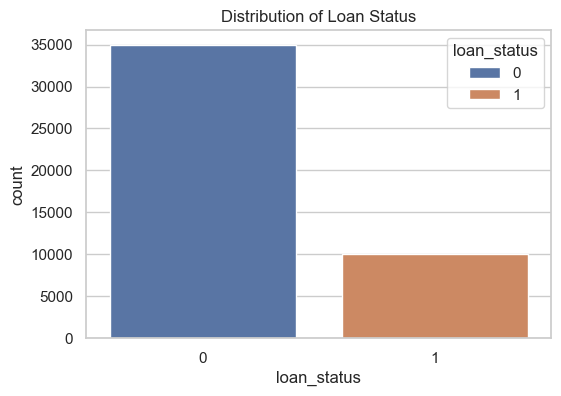

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status', hue='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

### Step 6: Visualizing Numerical Features
Let's look at the distribution of the person's age and income.

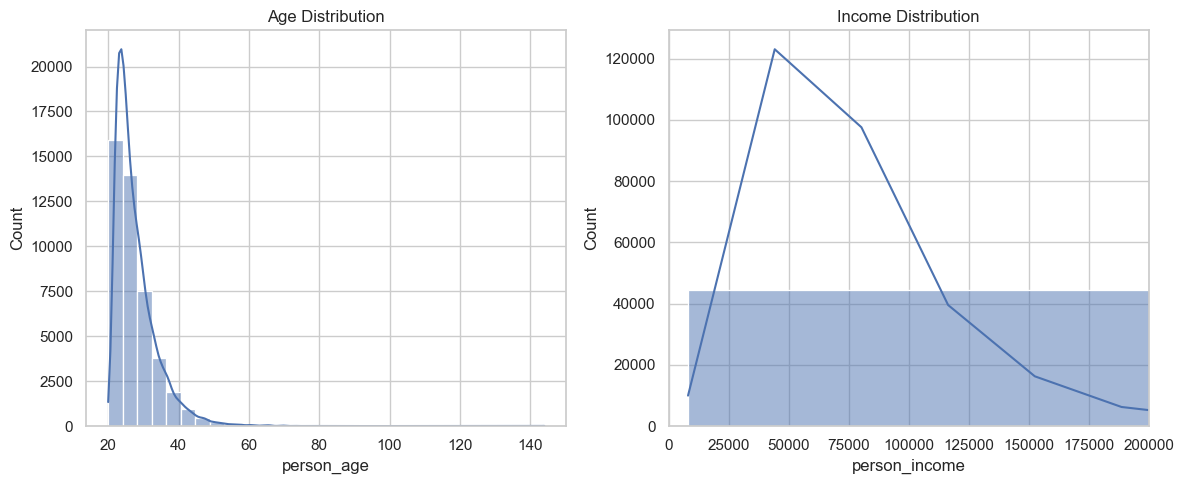

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['person_age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['person_income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlim(0, 200000) # Limiting x-axis because some extreme outlier incomes skew the graph

plt.tight_layout()
plt.show()

### Step 7: Correlation Heatmap
Correlation tells us how strongly two variables are related. Values close to 1 mean strong positive relationship, values close to -1 mean strong negative relationship.

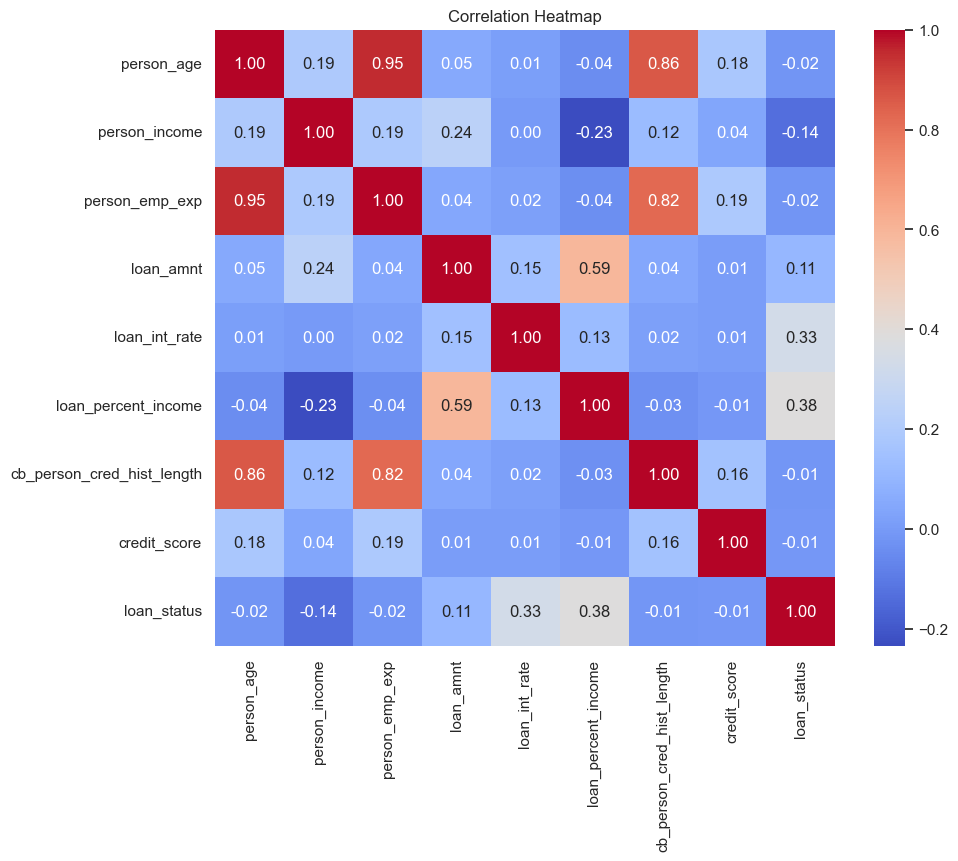

In [8]:
plt.figure(figsize=(10, 8))
# We only calculate correlation on numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Conclusion of EDA
From this EDA, you've learned to:
- Load and inspect data visually.
- Identify missing values.
- Understand the distribution of your target (`loan_status`) and features.
- Spot relationships through correlations (e.g., higher interest rates might correlate more with defaults).

**Next step:** Go to `Data_preprocessing.ipynb` to clean this data so an AI model can understand it!